<a href="https://colab.research.google.com/github/A01246519/ModelosDePrediccion/blob/main/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()


In [5]:
#Carga desde un archivo .csv sin indice
df= pd.read_excel('Datos_credicel_limpios1.xlsx')
df.head()

,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,...,1169.0,2106,0.0,0,14.1,6.1,0.9,0.0,0.0,0
1,1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,...,1949.0,2925,0.0,0,14.1,6.1,0.9,0.0,0.0,0
2,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,...,1469.0,2210,0.0,0,14.1,0.0,0.0,0.0,0.0,0
3,3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,...,1469.0,2210,0.0,0,14.1,6.1,0.9,0.0,0.0,0
4,4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,...,3224.0,6942,0.0,0,0.0,0.0,0.0,0.0,0.0,1000001


## **Precio vs Enganche**

In [6]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep= df[['enganche']]
Var_Dep= df['precio']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.93797895]),
 'rank_': 1,
 'singular_': array([71873.82651082]),
 'intercept_': 2201.6204291733966}

Modelo matemático: y= 1.93797895x + 2201.6204291733966

In [12]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep,Var_Dep)

0.46038792988867006

In [13]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['enganche']])
y_pred= model.predict(X=df[['enganche']])
y_pred

array([3713.24401242, 4236.49832969, 3151.23011608, ..., 4434.17218289,
       7626.02351828, 4306.265572  ])

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,3713.244012,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,4236.498330,1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,3151.230116,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,3151.230116,3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4284.947804,4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,2777.200178,22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,4544.636983,22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4434.172183,22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,7626.023518,22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,Maribel Ulibarri Medina,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

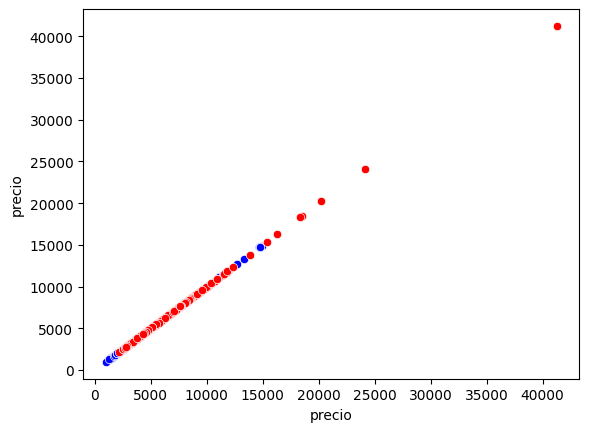

In [19]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones', y= 'Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [20]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.46038792988867006

In [21]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.678518923751335

Precio vs Monto financiado

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep2= df[['monto_financiado']]
Var_Dep2= df['precio']

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [43]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.17573073]),
 'rank_': 1,
 'singular_': array([165362.29426739]),
 'intercept_': 380.32825850329664}

Modelo matemático: 1.17573073x + 380.32825850329664

In [44]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep2,Var_Dep2)

0.8969598364305345

In [45]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred2= model.predict(X=df[['monto_financiado']])
y_pred2

array([1754.75747689, 2671.82744297, 2107.47669462, ..., 4727.00475156,
       8610.44333868, 5451.25487862])

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred2)
df

,Predicciones2,Predicciones 2,Predicciones,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,modelo,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1754.757477,1754.757477,3713.244012,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,2671.827443,2671.827443,4236.498330,1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,2107.476695,2107.476695,3151.230116,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,2107.476695,2107.476695,3151.230116,3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4170.884118,4170.884118,4284.947804,4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3968.658433,3968.658433,2777.200178,22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,3779.365787,3779.365787,4544.636983,22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4727.004752,4727.004752,4434.172183,22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,8610.443339,8610.443339,7626.023518,22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

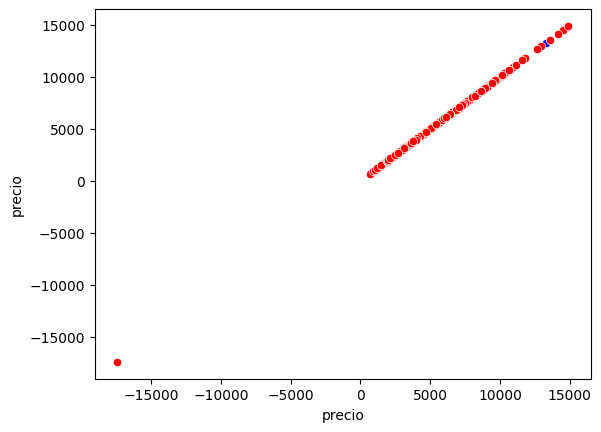

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones2', y= 'Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [33]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Var_Indep2, y=Var_Dep2)
coef_Deter2

0.8969598364305345

In [34]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.9470796357384813

Precio vs Costo total

In [51]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep3= df[['costo_total']]
Var_Dep3= df['precio']

In [52]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3, y=Var_Dep3)

LinearRegression()

In [53]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.49782094]),
 'rank_': 1,
 'singular_': array([359751.03527969]),
 'intercept_': 1159.6103776221248}

Modelo matemático = 0.49782094x + 1159.6103776221248

In [54]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep3,Var_Dep3)

0.7610877215641616

In [55]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['costo_total']])
y_pred3= model.predict(X=df[['costo_total']])
y_pred3

array([2208.02128568, 2615.73663882, 2259.79466386, ..., 4473.10658087,
       8653.80686857, 5029.67039626])

In [56]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_pred3)
df

,Predicciones3,Predicciones2,Predicciones 2,Predicciones,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,2208.021286,1754.757477,1754.757477,3713.244012,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,2615.736639,2671.827443,2671.827443,4236.498330,1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,2259.794664,2107.476695,2107.476695,3151.230116,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,2259.794664,2107.476695,2107.476695,3151.230116,3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,4615.483371,4170.884118,4170.884118,4284.947804,4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3890.656076,3968.658433,3968.658433,2777.200178,22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,3748.279286,3779.365787,3779.365787,4544.636983,22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4473.106581,4727.004752,4727.004752,4434.172183,22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,8653.806869,8610.443339,8610.443339,7626.023518,22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

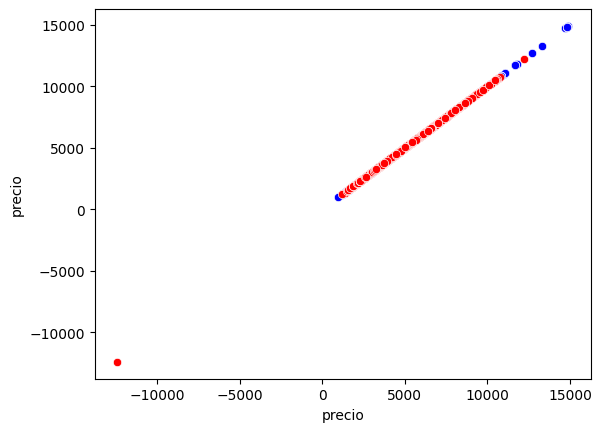

In [57]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones3', y= 'Predicciones3', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.7610877215641616

In [59]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.872403416754062

Costo total vs Monto financiado

In [60]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep4= df[['monto_financiado']]
Var_Dep4= df['costo_total']

In [61]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4, y=Var_Dep4)

LinearRegression()

In [62]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.02293875]),
 'rank_': 1,
 'singular_': array([165362.29426739]),
 'intercept_': -523.1436226651922}

Modelo matemático: 2.02293875x + -523.1436226651922


In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep4,Var_Dep4)

0.8646380417764321

In [64]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred4= model.predict(X=df[['monto_financiado']])
y_pred4

array([ 1841.67177313,  3419.56399617,  2448.55339738, ...,
        6955.66092675, 13637.42760967,  8201.7911952 ])

In [65]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred4)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones 2,Predicciones,Unnamed: 0,folio,tag,folio_solicitud,fecha,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,1841.671773,2208.021286,1754.757477,1754.757477,3713.244012,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,3419.563996,2615.736639,2671.827443,2671.827443,4236.498330,1,4,M418YNR4,33,2021-11-12 19:15:58,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,3,6,9I08UIQZ,38,2021-11-13 15:45:39,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,5998.810899,4615.483371,4170.884118,4170.884118,4284.947804,4,7,JMF4LKYU,44,2021-11-13 16:10:15,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,5650.865435,3890.656076,3968.658433,3968.658433,2777.200178,22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,5325.172296,3748.279286,3779.365787,3779.365787,4544.636983,22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,6955.660927,4473.106581,4727.004752,4727.004752,4434.172183,22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,13637.427610,8653.806869,8610.443339,8610.443339,7626.023518,22733,22970,PETLF56C,96536,2023-04-18 18:49:08,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

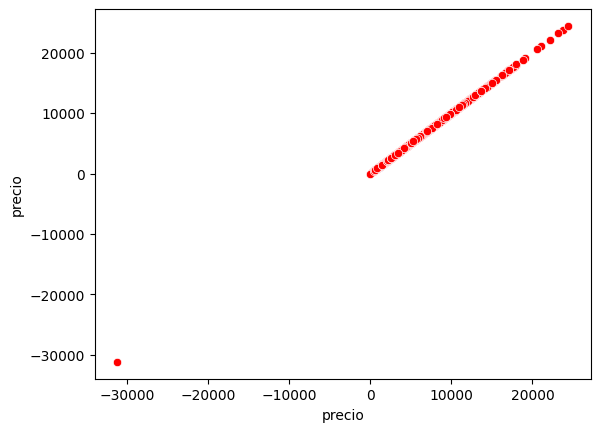

In [66]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='costo_total', color="blue", data=df)
sns.scatterplot(x='Predicciones4', y= 'Predicciones4', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Var_Indep4, y=Var_Dep4)
coef_Deter4

0.8646380417764321

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.929859151579653

Precio vs Semana

In [70]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep5= df[['semana']]
Var_Dep5= df['precio']

In [71]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5, y=Var_Dep5)

LinearRegression()

In [72]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.05168621]),
 'rank_': 1,
 'singular_': array([15255.71836322]),
 'intercept_': 1845.0221820544052}

Modelo matemático: 9.05168621x + 1845.0221820544052

In [73]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep5,Var_Dep5)

0.45248958591809174

In [74]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred5= model.predict(X=df[['semana']])
y_pred5

array([2578.20876525, 3881.65157982, 3383.80883814, ..., 4162.2538524 ,
       5338.97305999, 4551.47635953])

In [75]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred5)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones 2,Predicciones,Unnamed: 0,folio,tag,folio_solicitud,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,2578.208765,1841.671773,2208.021286,1754.757477,1754.757477,3713.244012,0,3,HDNAWQ3A,30,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,3881.651580,3419.563996,2615.736639,2671.827443,2671.827443,4236.498330,1,4,M418YNR4,33,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,3383.808838,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,2,5,SZ7V3NZT,37,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,3383.808838,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,3,6,9I08UIQZ,38,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,3456.222328,5998.810899,4615.483371,4170.884118,4170.884118,4284.947804,4,7,JMF4LKYU,44,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3754.927973,5650.865435,3890.656076,3968.658433,3968.658433,2777.200178,22730,22967,92KQVRIX,96502,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,3655.359425,5325.172296,3748.279286,3779.365787,3779.365787,4544.636983,22731,22968,NWB2EA8J,96479,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4162.253852,6955.660927,4473.106581,4727.004752,4727.004752,4434.172183,22732,22969,VDTRJ2W6,96442,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,5338.973060,13637.427610,8653.806869,8610.443339,8610.443339,7626.023518,22733,22970,PETLF56C,96536,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

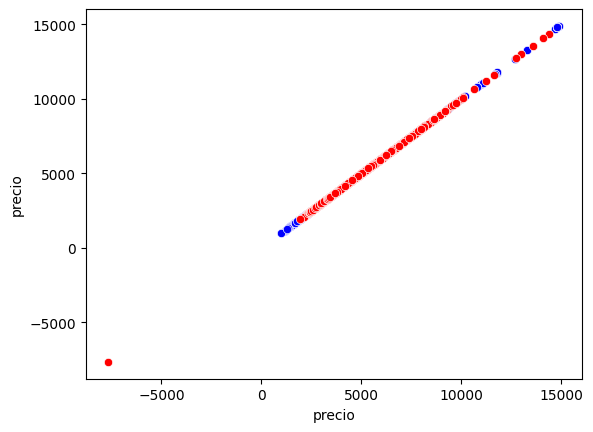

In [76]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones5', y= 'Predicciones5', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Var_Indep5, y=Var_Dep5)
coef_Deter5

0.45248958591809174

In [79]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.6726734615830268

Precio vs Pagos realizados

In [81]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep6= df[['pagos_realizados']]
Var_Dep6= df['precio']

In [82]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6, y=Var_Dep6)

LinearRegression()

In [83]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.38408591]),
 'rank_': 1,
 'singular_': array([1463.82068582]),
 'intercept_': 3972.7647404984823}

Modelo matemático: 2.38408591x + 3972.7647404984823

In [84]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep6,Var_Dep6)

0.0002890039942433642

In [85]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred6= model.predict(X=df[['pagos_realizados']])
y_pred6

array([3972.7647405, 3972.7647405, 3972.7647405, ..., 3972.7647405,
       3972.7647405, 3972.7647405])

In [86]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred5)
df

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones 2,Predicciones,Unnamed: 0,folio,tag,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,2578.208765,2578.208765,1841.671773,2208.021286,1754.757477,1754.757477,3713.244012,0,3,HDNAWQ3A,...,1169.0,2106,0.0,0,14.1,6.1,0.90,0.00,0.0,0
1,3881.651580,3881.651580,3419.563996,2615.736639,2671.827443,2671.827443,4236.498330,1,4,M418YNR4,...,1949.0,2925,0.0,0,14.1,6.1,0.90,0.00,0.0,0
2,3383.808838,3383.808838,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,2,5,SZ7V3NZT,...,1469.0,2210,0.0,0,14.1,0.0,0.00,0.00,0.0,0
3,3383.808838,3383.808838,2448.553397,2259.794664,2107.476695,2107.476695,3151.230116,3,6,9I08UIQZ,...,1469.0,2210,0.0,0,14.1,6.1,0.90,0.00,0.0,0
4,3456.222328,3456.222328,5998.810899,4615.483371,4170.884118,4170.884118,4284.947804,4,7,JMF4LKYU,...,3224.0,6942,0.0,0,0.0,0.0,0.00,0.00,0.0,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3754.927973,3754.927973,5650.865435,3890.656076,3968.658433,3968.658433,2777.200178,22730,22967,92KQVRIX,...,3052.0,5486,0.0,0,14.1,10.0,27.40,-1.13,0.0,"K0,J0,D8,E2"
22731,3655.359425,3655.359425,5325.172296,3748.279286,3779.365787,3779.365787,4544.636983,22731,22968,NWB2EA8J,...,2891.0,5200,0.0,0,14.1,9.0,19.00,7.48,0.0,"K0,J0,D8,E2"
22732,4162.253852,4162.253852,6955.660927,4473.106581,4727.004752,4727.004752,4434.172183,22732,22969,VDTRJ2W6,...,3697.0,6656,0.0,0,14.1,11.0,26.65,0.75,0.0,"K0,D7,F7,D8"
22733,5338.973060,5338.973060,13637.427610,8653.806869,8610.443339,8610.443339,7626.023518,22733,22970,PETLF56C,...,7000.0,15054,0.0,0,14.1,14.0,-17.35,-0.14,0.0,"J0,G1,E0,E2"


<Axes: xlabel='precio', ylabel='precio'>

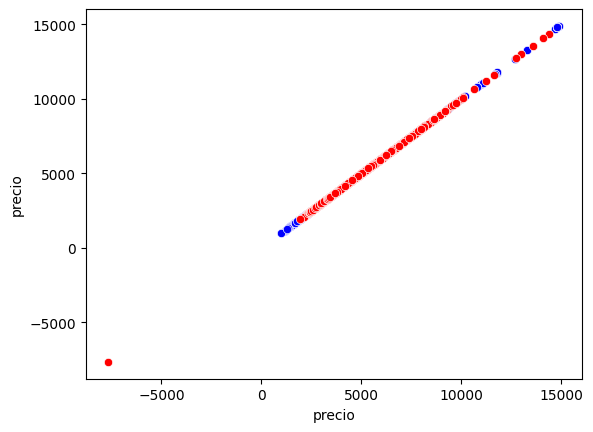

In [87]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones6', y= 'Predicciones6', color="red", data=df)

In [88]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Var_Indep6, y=Var_Dep6)
coef_Deter6

0.0002890039942433642

In [89]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.017000117477340097

In [92]:
#Unimos las variables utilizadas en un nuevo dataframe
df_ejercicio= df[["precio", "monto_financiado", "costo_total", "semana", "pagos_realizados"]]

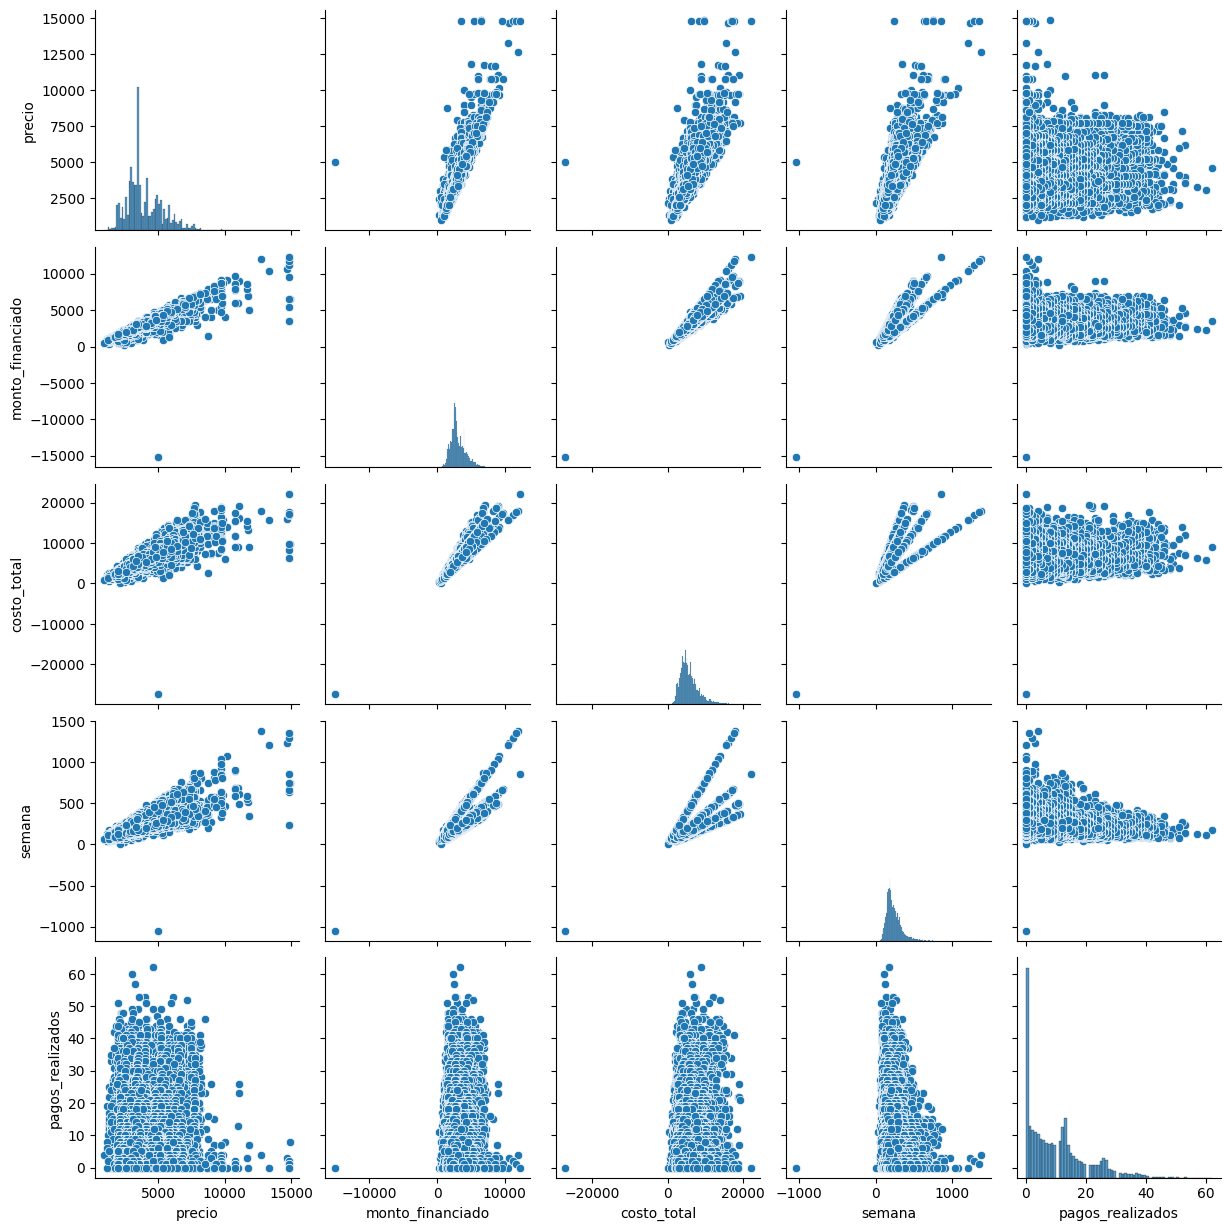

In [93]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_ejercicio)

In [94]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df_ejercicio.corr()
Corr_Factors

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.947080,0.872403,0.672673,0.017000
monto_financiado,0.947080,1.000000,0.929859,0.688111,0.052593
costo_total,0.872403,0.929859,1.000000,0.411911,0.132380
semana,0.672673,0.688111,0.411911,1.000000,-0.133589
pagos_realizados,0.017000,0.052593,0.132380,-0.133589,1.000000


In [95]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.947080,0.872403,0.672673,0.017000
monto_financiado,0.947080,1.000000,0.929859,0.688111,0.052593
costo_total,0.872403,0.929859,1.000000,0.411911,0.132380
semana,0.672673,0.688111,0.411911,1.000000,0.133589
pagos_realizados,0.017000,0.052593,0.132380,0.133589,1.000000


<Axes: >

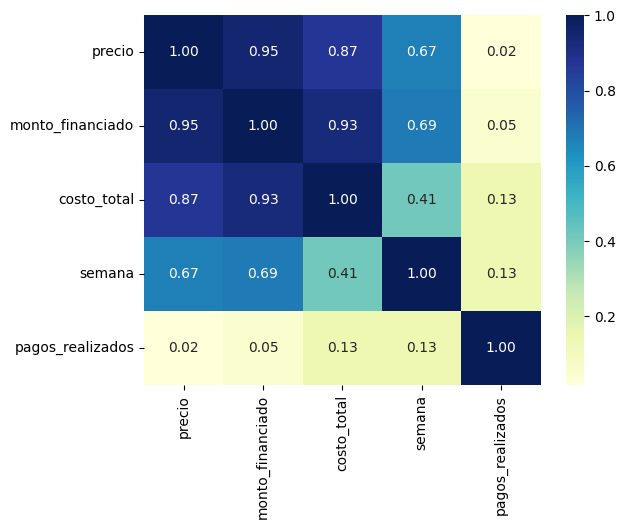

In [96]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map